# 추세투자법

| 항목  |      설명      |
|------|:----------- -:|
| 스타일 |  자산배분 + 모멘텀 |
| 기대 CAGR | 코스피 + 2 ~ 3%   |
| 매수 전략 | 3개월 이동평균이 상승반전하면 코스피 지수 매수|
| 매도 전략 | 3개월 이동평균이 하락반전하면 코스피 지수 매도한 후 전액 현금 보유|

In [1]:
%load_ext autoreload
%autoreload 2

## Data preparation

In [ ]:
from lib.utils.data_utils import load_data

kospi_df = load_data('^KS11')

## Run back-test.

In [17]:
import backtrader as bt

from lib.strategies.sma_momentum_strategy import SMAMomentumStrategy
from lib.utils.runtime_util import create_and_configure_cerebro

# Create a backtest runtime.
initial_cash = 1000000
sma_cerebro = create_and_configure_cerebro(
    SMAMomentumStrategy,
    {
        bt.feeds.PandasData(dataname=kospi_df): dict(name='KOSPI'),
    },
    strategy_params=dict(maperiod=60, buy_margin=0.03, rocperiod=7),
    initial_cash=initial_cash
)

# Run it!
print('Starting Portfolio Value: %.2f' % sma_cerebro.broker.getvalue())
sma_res = sma_cerebro.run()
print('Final Portfolio Value: %.2f' % sma_cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
Final Portfolio Value: 6172395.53


## Visualize your strategy

<IPython.core.display.Javascript object>


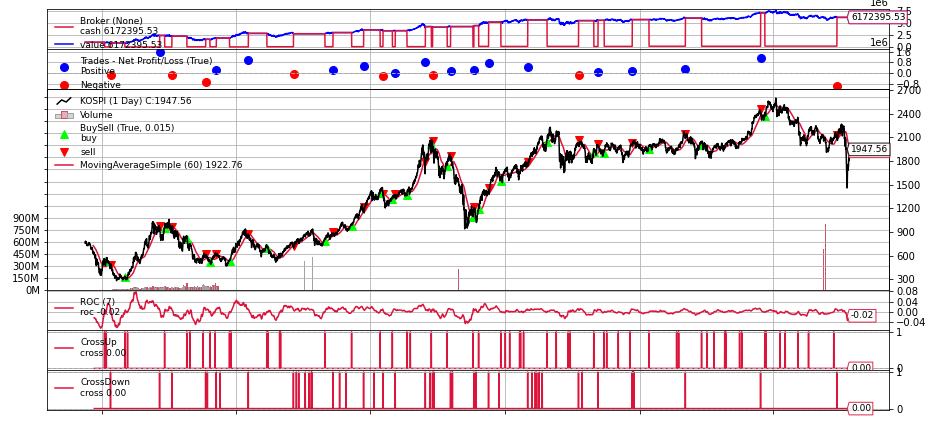

[[<Figure size 936x432 with 7 Axes>]]

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,6)
sma_cerebro.plot()

or 
## Analyze the performance by yourself.

In [11]:
%matplotlib inline
import empyrical as ep
import pandas as pd

from lib.utils.analyzer_utils import get_annual_return_analysis_df, get_pos_values_analysis_df, get_default_perf_analysis_df

pd.set_option('float_format', '{:.3f}'.format)

sma_return_df = get_annual_return_analysis_df(sma_res[0])
sma_pos_values_df = get_pos_values_analysis_df(sma_res[0])
sma_perf_report_df = get_default_perf_analysis_df(sma_res[0], 'SmaMomentum')
sma_perf_report_df

,initial_value,final_value,period_start,period_end,sharpe_ratio,mdd,cagr
SmaMomentum,1000000.000,6172395.532,1997-07-01,2020-04-29,0.385,48.398,0.085


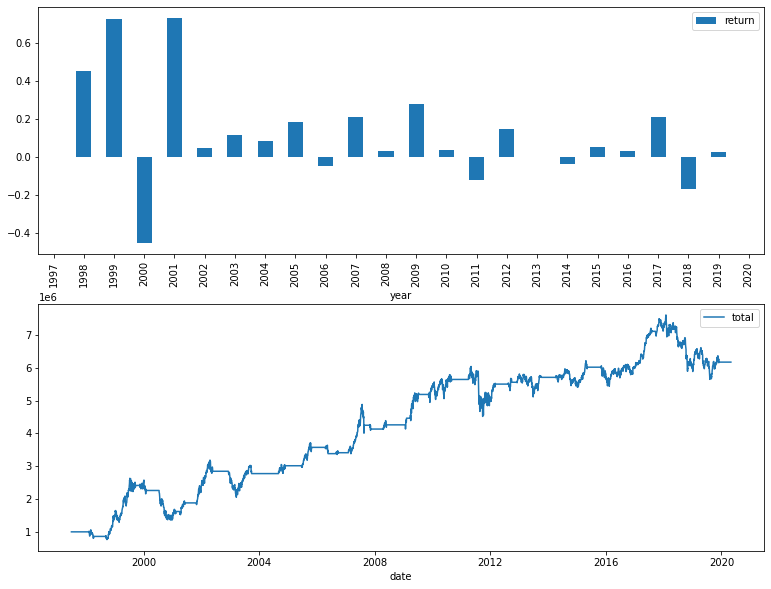

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


sma_return_df.plot.bar(ax=ax1)
sma_pos_values_df[['total']].plot(ax=ax2)

# Benchmark test

In [13]:
# Scenario 1
from lib.strategies.hold_all_strategy import HoldAllStrategy
from lib.utils.analyzer_utils import get_annual_return_analysis_df, get_default_perf_analysis_df, get_pos_values_analysis_df
kospi_cerebro = create_and_configure_cerebro(
    HoldAllStrategy,
    {
        bt.feeds.PandasData(dataname=kospi_df): dict(name='KOSPI'),
    },
    strategy_params=dict(buy_date='1997-01-01'),
    initial_cash=initial_cash
)

# Run it!
print('Starting Portfolio Value: %.2f' % kospi_cerebro.broker.getvalue())
kospi_res = kospi_cerebro.run()
print('Final Portfolio Value: %.2f' % kospi_cerebro.broker.getvalue())

kospi_annual_return_df = get_annual_return_analysis_df(kospi_res[0])
kospi_pos_values_df = get_pos_values_analysis_df(kospi_res[0])
kospi_perf_report_df = get_default_perf_analysis_df(kospi_res[0], 'HoldStrategy_KOSPI')

Starting Portfolio Value: 1000000.00
Final Portfolio Value: 2544881.05


In [14]:
import pandas as pd
overall_report_df = pd.concat([sma_perf_report_df, kospi_perf_report_df])
overall_report_df

,initial_value,final_value,period_start,period_end,sharpe_ratio,mdd,cagr
SmaMomentum,1000000.000,6172395.532,1997-07-01,2020-04-29,0.385,48.398,0.085
HoldStrategy_KOSPI,1000000.000,2544881.048,1997-07-01,2020-04-29,0.255,64.095,0.043


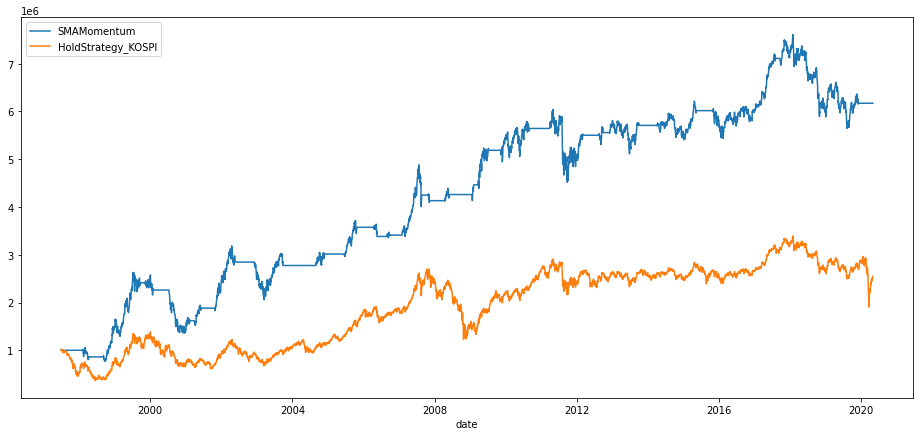

In [15]:
df = pd.DataFrame()
df['SMAMomentum'] = sma_pos_values_df['total']
df['HoldStrategy_KOSPI'] = kospi_pos_values_df['total']
plt.rcParams["figure.figsize"] = (16,7)
df.plot()